In [1]:
import sys
sys.path.append('../scripts/')

In [2]:
from conn import connection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
engine = connection()

Connection success


# Geographic Analysis

### Order distribution by city/state

In [6]:
df_order = pd.read_sql("""
select 
    c.customer_state,
    c.customer_city,
    count(o.order_id) as total_orders
from customers c
join orders o on c.customer_id = o.customer_id
group by c.customer_state, c.customer_city;
""", engine)

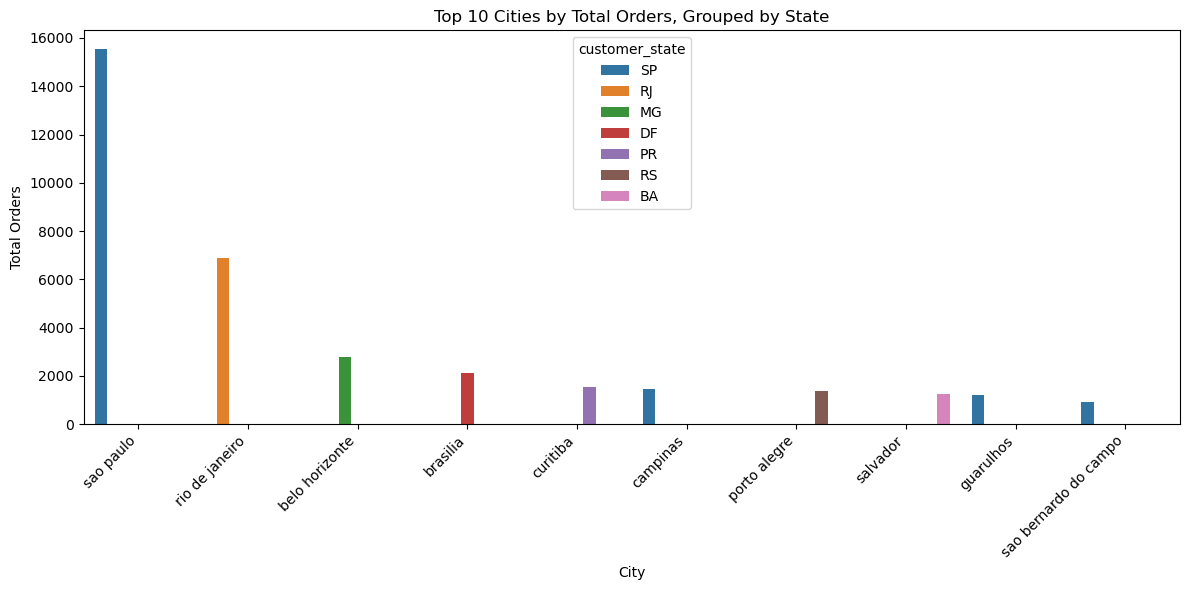

In [7]:
df_top_cities = df_order.sort_values('total_orders', ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(data=df_top_cities, x='customer_city', y='total_orders', hue='customer_state')

plt.xticks(rotation=45, ha='right')

plt.xlabel('City')
plt.ylabel('Total Orders')
plt.title('Top 10 Cities by Total Orders, Grouped by State')

plt.tight_layout()

plt.show()